In [9]:
!pip install dlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!pip install imutils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
import cv2
import dlib
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt

In [20]:
image_path = "/content/drive/MyDrive/Biometrics/000009.jpg"
filter_path = "/content/drive/MyDrive/Biometrics/shape_predictor_68_face_landmarks.dat"

print(dlib.__version__)
print(imutils.__version__)

19.24.0
0.5.4


In [21]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(filter_path)

In [22]:
image = cv2.imread(image_path)
image = imutils.resize(image, width=500)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detect faces in the image
rects = detector(image, 1)

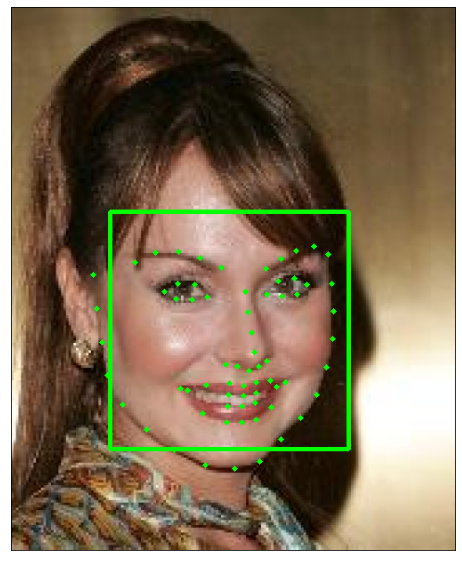

In [23]:
for (i, rect) in enumerate(rects):
    shape = predictor(image, rect)
    shape = face_utils.shape_to_np(shape)
    
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 255, 0), 3)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()